<a href="https://colab.research.google.com/github/ParbatiDebbarma/Walmart/blob/main/Walmart_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Walmart**

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/walmart_data.csv')
df.head() #displays the first five rows of the dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Business Problem**

---


The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

# **Dataset**

---



The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

**User_ID:** User ID

**Product_ID:**	Product ID

**Gender:**	Sex of User

**Age:**	Age in bins

**Occupation:**	Occupation(Masked)

**City_Category:**	Category of the City (A,B,C)

**StayInCurrentCityYears:**	Number of years stay in current city

**Marital_Status:**	Marital Status

**ProductCategory:**	Product Category (Masked)

**Purchase:**	Purchase Amount

In [ ]:
print(f'Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}') #displays the number of rows and columns in the dataset

Number of rows: 550068
Number of columns: 10


In [ ]:
df.info() #displays the data types of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


There are 550068 entriues in the dataset, and it is also seen that

In [ ]:
df.describe() #displays the summary statistics of the dataset

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


The dataset provides information on the following variables:

**User_ID:** The dataset includes a total of 550,068 user records.

**Occupation:** The dataset includes values ranging from 0 to 20, indicating different occupations.

**Product_Category:** The dataset includes values ranging from 1 to 20, representing different product categories.

**Purchase:** The dataset includes purchase values ranging from 12 to 23,961.

In [ ]:
df.isnull().sum() #checking for nulls

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.duplicated().sum() #checking for duplicates

0

There are no null values or duplicates in the dataset, the datatset is clean

# **Memory Optimization**

---



In [ ]:
#Updating the Marital Status Column
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [ ]:
#Coverting Product Category column datatype into int8
df['Product_Category'] = df['Product_Category'].astype('int8')

#Converting Ocupation column datatype into int8
df['Occupation'] = df['Occupation'].astype('int8')


In [ ]:
df['Age'] = df['Age'].astype('category')  #Converting Age column datatype into category

In [ ]:
df['City_Category'] = df['City_Category'].astype('category') #Converting City Category column datatype into category

In [ ]:
 #Converting Stay In Current City Years column datatype into category
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

In [ ]:
df['User_ID'] = df['User_ID'].astype('int32') #Converting User ID column datatype into int32

In [ ]:
df.info() #displays the data types of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


Before Mmeory optimization the dataframe took 42.0+ MB of memory, after data cleaning and conversions of datatypes the dataframe's memory usage dropped down to 17.8+ MB (57.62% of memory usage reduction)

# **Non Graphical Analysis of the Walmart Data**

---



In [ ]:
df['User_ID'].nunique() #displays the number of unique values in the User ID column

5891

There are 5891 customers who made atleast one purchase

In [ ]:
#The proportion (or percentage) of transactions for each gender rather than the total count.
transaction_counts = df['Gender'].value_counts(normalize = True)
print(transaction_counts)

Gender
M    0.753105
F    0.246895
Name: proportion, dtype: float64


In [ ]:
np.round(transaction_counts * 100, 2) #rounding off to 2 digits after getting the percentage

,proportion
Gender,
M,75.31
F,24.69


 Males accounted for 75.31% of transactions, significantly outnumbering females, who represented 24.69%. This suggests a male-dominated purchasing trend in the dataset.








**Cumulative distribution based on Occupation**

In [ ]:
np.round(df['Occupation'].value_counts(normalize = True) * 100, 2).cumsum() #displays the cumulative percentage of each occupation in the dataset

,proportion
Occupation,
4,13.15
0,25.81
7,36.56
1,45.18
17,52.46
20,58.56
12,64.23
14,69.19
2,74.02


 - From the cumulative distribution, it can be inferred that 82.33% of the total transactions are made by customers belonging to the top 11 occupations. This suggests a concentration of transactions among a relatively small subset of occupations.

**Age Distribution**

In [ ]:
age_dist = df.groupby('Age', observed=False)['Purchase'].sum() #displays the total purchase amount for each age group
age_dist

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


**Percentage share of Age categories**

In [ ]:
 #displays the percentage share of each age group in the dataset
age_dist_percent = np.round((df.groupby('Age', observed=False)['Purchase'].sum() / df['Purchase'].sum()) * 100, 2)
age_dist_percent


,Purchase
Age,
0-17,2.65
18-25,17.93
26-35,39.87
36-45,20.15
46-50,8.26
51-55,7.20
55+,3.94


- The percentage share of total purchases by age group shows that the 26-35 age range accounts for the largest portion at 39.87%, while the 55+ age group represents the smallest share at 3.94%. This distribution indicates that younger age groups contribute more significantly to overall purchases compared to older age groups.

**Purchases based on City Categories**

In [ ]:
city_cat = df.groupby('City_Category', observed=False)['Purchase'].sum() #displays the total purchase amount for each age group
city_cat

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


**Percentage share of city categories**

In [ ]:
city_cat_percent = np.round((df.groupby('City_Category', observed=False)['Purchase'].sum() / df['Purchase'].sum()) * 100, 2)
city_cat_percent

,Purchase
City_Category,
A,25.83
B,41.52
C,32.65


---


**Top 10 users that made most purchases**



In [ ]:
# Users with highest number of purchases
df.groupby(['User_ID'])['Purchase'].count().nlargest(10)

,Purchase
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
1003618,767
1001150,752
1001015,740
1005795,729


**Transactions made by each gender category**

In [ ]:
# Counts transactions per user and then group by gender
transaction_counts = df.groupby('Gender')['User_ID'].count()

# Calculates the number of unique users per gender
unique_users = df.groupby('Gender')['User_ID'].nunique()

# Calculates average number of transactions per user for each gender
average_transactions = transaction_counts / unique_users

# Prints the results
print('Average number of transactions made by each Male on Black Friday is', round(average_transactions.get('M', 0), 2))
print('Average number of transactions made by each Female on Black Friday is', round(average_transactions.get('F', 0), 2))

Average number of transactions made by each Male on Black Friday is 98.05
Average number of transactions made by each Female on Black Friday is 81.52


- On Black Friday, each male customer made an average of 98.05 transactions, while each female customer made an average of 81.52 transactions. This indicates that male customers were more active, engaging in a higher number of transactions compared to their female counterparts.

**Total Revenue generated by Walmart from each Gender**

-  Walmart generated a total revenue of 1,186,232,642 from female customers, which constitutes 23.28% of the total revenue, while male customers contributed $3,909,580,100, making up 76.72% of the total revenue. This indicates a significantly higher revenue contribution from male customers compared to female customers.

In [ ]:
# The total revenue generated by each gender
total_revenue = df.groupby('Gender')['Purchase'].sum()

# The total revenue across all genders
total_revenue_all = total_revenue.sum()

# The percentage share of each gender
percent_share = (total_revenue / total_revenue_all) * 100

# Combining the results into a DataFrame
revenue_summary = pd.DataFrame({
    'Total Revenue': total_revenue,
    'Percentage Share': np.round(percent_share, 2)})

revenue_summary

,Total Revenue,Percentage Share
Gender,,
F,1186232642,23.28
M,3909580100,76.72


**The average total purchase made by each gender**

In [ ]:
total_purchase_per_user = df.groupby(['Gender', 'User_ID'])['Purchase'].sum()
# The average total purchase per user for each gender
average_total_purchase = total_purchase_per_user.groupby('Gender').mean()

average_total_purchase

,Purchase
Gender,
F,712024.394958
M,925344.402367


**Average Revenue generated by Walmart from each Gender per transaction**

In [ ]:
revenue_per_gender = df.groupby('Gender')['Purchase'].sum()
transaction_count_per_gender = df.groupby('Gender')['Purchase'].count()

# Calculates the average revenue per transaction for each gender
average_revenue_per_transaction = revenue_per_gender / transaction_count_per_gender

average_revenue_per_transaction

,Purchase
Gender,
F,8734.565765
M,9437.526040


On average, Walmart generated 8,734.57 USD per transaction from female customers and 9,437.53 USD per transaction from male customers. This indicates that male customers, on average, contribute more revenue per transaction

In [ ]:
unique_customers_per_marital_status = df.groupby('Marital_Status', observed = True)['User_ID'].nunique()

unique_customers_per_marital_status

,User_ID
Marital_Status,
Married,2474
Single,3417


**Number of unique customers based on Marital Status**

In [ ]:
#Number of unique customers for each marital status
unique_customers_per_marital_status = df.groupby('Marital_Status', observed = True)['User_ID'].nunique()

#Total number of unique customers
total_unique_customers = unique_customers_per_marital_status.sum()

#Percentage share of each marital status
percent_share = (unique_customers_per_marital_status / total_unique_customers) * 100

# Combining the results into a DataFrame
marital_status_summary = pd.DataFrame({'Unique_Customers': unique_customers_per_marital_status,
                                       'Percent_Share': np.round(percent_share, 2)})
marital_status_summary

,Unique_Customers,Percent_Share
Marital_Status,,
Married,2474,42.0
Single,3417,58.0



- The data indicates that there are 2,474 unique customers classified as married, representing 42.0% of the total unique customers. In contrast, 3,417 unique customers are classified as single, making up 58.0% of the total. This shows a higher proportion of single customers compared to married ones in the dataset.

**Transactions made by marital status category**

In [ ]:
df.groupby(by = ['Marital_Status'])['User_ID'].count() #displays the number of transactions made by each marital status category

<ipython-input-342-5178a5ce9d19>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = ['Marital_Status'])['User_ID'].count() #displays the number of transactions made by each marital status category


,User_ID
Marital_Status,
Married,225337
Single,324731


**Total Revenue generated by Walmart from each Marital Status**

In [ ]:
total_revenue_per_marital_status = df.groupby('Marital_Status', observed = True)['Purchase'].sum()

#Total revenue across all marital statuses
total_revenue_all = total_revenue_per_marital_status.sum()

#Percentage share of each marital status
percent_share = (total_revenue_per_marital_status / total_revenue_all) * 100

# Combining the results into a DataFrame
marital_status_revenue_summary = pd.DataFrame({
    'Total_Revenue': total_revenue_per_marital_status,
    'Percent_Share': np.round(percent_share, 2)})

marital_status_revenue_summary

,Total_Revenue,Percent_Share
Marital_Status,,
Married,2086885295,40.95
Single,3008927447,59.05


- Walmart generated a total revenue of 2,086,885,295 USD from married customers, accounting for 40.95% of the total revenue. Single customers contributed 3,008,927,447 USD, which makes up 59.05% of the total revenue, indicating a higher revenue contribution from single customers compared to married ones.

**Total Revenue generated by Walmart from each City Category**

In [ ]:
city_revenue = df.groupby(by=['City_Category'])['Purchase'].sum().to_frame().sort_values(by='Purchase', ascending=False)

# Percentage share
city_revenue['percent_share'] = np.round((city_revenue['Purchase'] / city_revenue['Purchase'].sum()) * 100, 2)

# Cumulative percentage share
city_revenue['cumulative_percent_share'] = city_revenue['percent_share'].cumsum()

# Displaying the result
city_revenue

<ipython-input-147-365c7a226794>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_revenue = df.groupby(by=['City_Category'])['Purchase'].sum().to_frame().sort_values(by='Purchase', ascending=False)


,Purchase,percent_share,cumulative_percent_share
City_Category,,,
B,2115533605,41.52,41.52
C,1663807476,32.65,74.17
A,1316471661,25.83,100.00


**Total Revenue generated by Walmart from each Product Category**

In [ ]:
# Group by product category and sum the purchase amount
product_revenue = df.groupby(by=['Product_Category'])['Purchase'].sum().to_frame().sort_values(by='Purchase', ascending=False)

# Percentage share
product_revenue['percent_share'] = np.round((product_revenue['Purchase'] / product_revenue['Purchase'].sum()) * 100, 2)

# Cumulative percentage share
product_revenue['cumulative_percent_share'] = product_revenue['percent_share'].cumsum()

# Displaying the result
product_revenue

,Purchase,percent_share,cumulative_percent_share
Product_Category,,,
1,1910013754,37.48,37.48
5,941835229,18.48,55.96
8,854318799,16.77,72.73
6,324150302,6.36,79.09
2,268516186,5.27,84.36
3,204084713,4.00,88.36
16,145120612,2.85,91.21
11,113791115,2.23,93.44
10,100837301,1.98,95.42


# **Visual Analysis - Univariate, Bivariate**

---



**Distribution of the data for purchases**

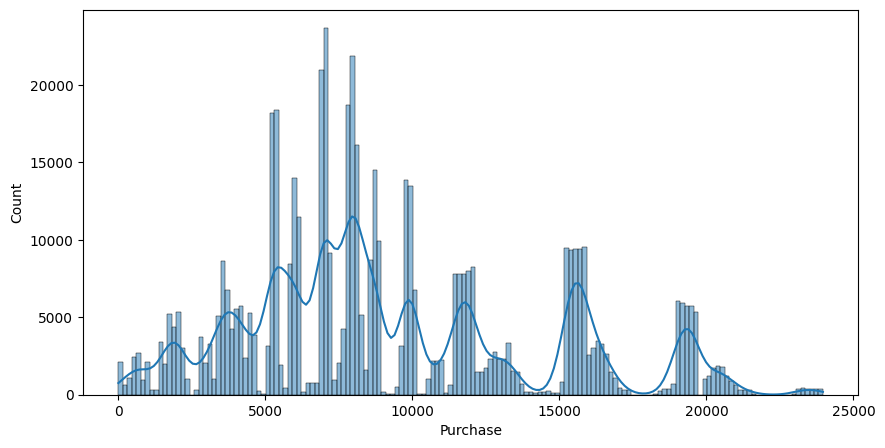

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Purchase", kde=True)
plt.show()

**Purchases Outliers**

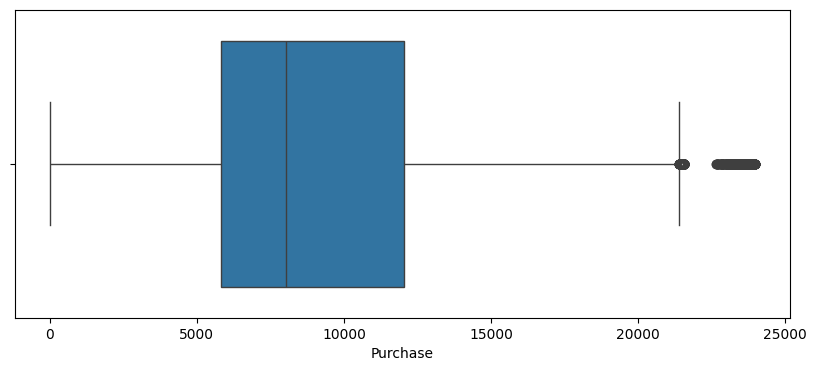

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Purchase')
plt.show()

The data reveals that purchase values between 5,000 and 10,000 are most frequent, with a mean of 9,263 and a median of 8,047 which we could see earlier in the analysis. There is a clear presence of outliers which indicate significant deviations from the typical purchase values, suggesting a varied range of spending behaviors among customers.

**DISTRIBUTION OF AGE OVER DATA**

In [ ]:
#The number of unique customers for each age group
age_dist_percent = pd.DataFrame(df.groupby(by=['Age'])['User_ID'].
nunique()).reset_index().rename(columns={'User_ID': 'unique_customers'})

#Percentage share of each age group
age_dist_percent['percent_share'] = np.round(age_dist_percent['unique_customers'] / age_dist_percent['unique_customers'].sum() * 100, 2)

# Calculating the cumulative percentage
age_dist_percent['cumulative_percent'] = age_dist_percent['percent_share'].cumsum()
age_dist_percent

<ipython-input-151-cfd983a7abc6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist_percent = pd.DataFrame(df.groupby(by=['Age'])['User_ID'].


,Age,unique_customers,percent_share,cumulative_percent
0,0-17,218,3.70,3.70
1,18-25,1069,18.15,21.85
2,26-35,2053,34.85,56.70
3,36-45,1167,19.81,76.51
4,46-50,531,9.01,85.52
5,51-55,481,8.16,93.68
6,55+,372,6.31,99.99


**Unique customers by Age Group**

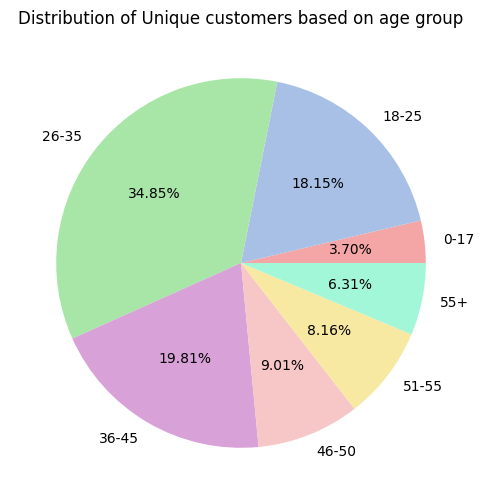

In [ ]:
plt.figure(figsize = (6, 6)) #set the figure size
plt.title('Distribution of Unique customers based on age group') #set the title of the plot
plt.pie(x = age_dist_percent['percent_share'], labels = age_dist_percent['Age'],  autopct = '%.2f%%',
        colors= ['#f4a6a6', '#a8c0e6', '#a8e6a8', '#d8a2d8', '#f7c6c7', '#f7e9a2', '#a2f7d8'] ) #create a pie chart
plt.show() #display the plot


**GENDER SPECIFIC DISTRIBUTION OVER DATA**

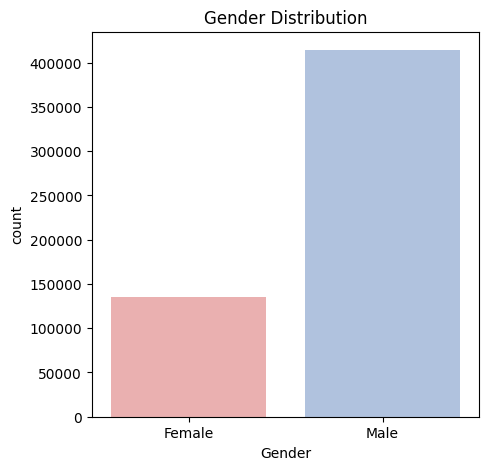

In [ ]:
plt.figure(figsize = (5, 5)) #set the figure size
plt.title('Gender Distribution') #set the title of the plot
sns.countplot(data = df, x = 'Gender',hue='Gender', palette=['#f4a6a6', '#a8c0e6'] ) #create a count plot
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

- The disparity between the male and female counts is substantial, with males representing a notably larger proportion of the total population.

**DISTRIBUTION OF OCCUPATION OF THE CUSTOMERS**

<ipython-input-154-6a5d66ef81f5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Occupation', palette=colors)


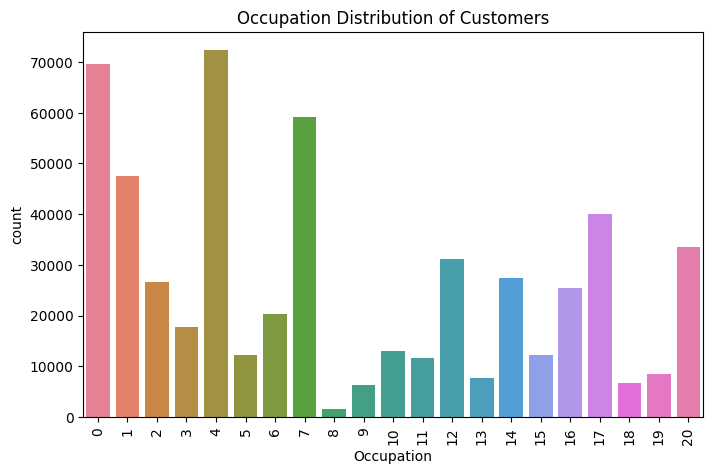

In [ ]:
plt.figure(figsize = (8, 5)) #set the figure size
plt.title('Occupation Distribution of Customers') #set the title of the plot
count = df['Occupation'].nunique()
colors = sns.color_palette("husl", count)
sns.countplot(data=df, x='Occupation', palette=colors)
plt.xticks(rotation=90)
plt.show() #display the plot

- We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchases.

**DISTRIBUTION OF THE CITY CATEGORIES**

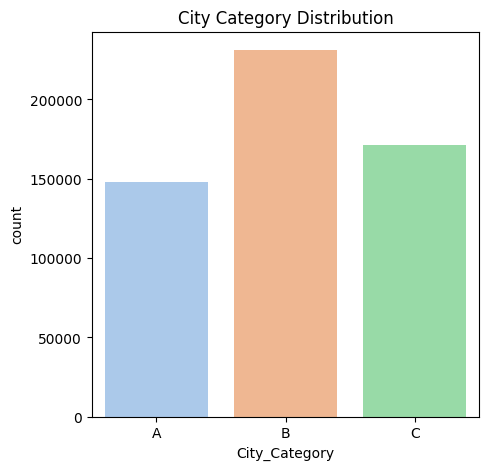

In [ ]:
plt.figure(figsize = (5, 5)) #set the figure
plt.title('City Category Distribution') #set the title of the plot
count = df['City_Category'].nunique()
colors = sns.color_palette("pastel", count)
sns.countplot(data = df, x = 'City_Category', hue = 'City_Category', palette=colors )
plt.show() #display the plot

-  The purchases are highest from City category B.

**MARITAL STATUS OF THE CUSTOMERS**

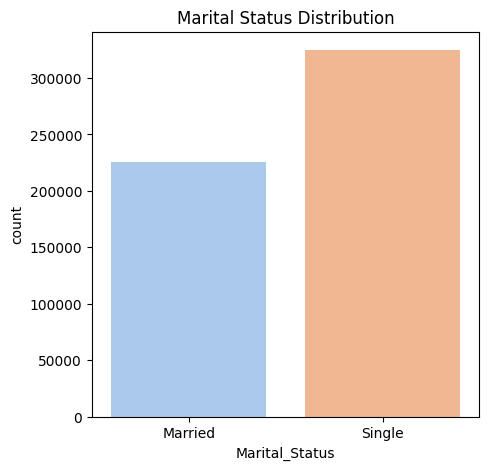

In [ ]:
plt.figure(figsize = (5, 5))
plt.title('Marital Status Distribution')
count = df['Marital_Status'].nunique()
colors = sns.color_palette("pastel", count)
sns.countplot(data = df, x = 'Marital_Status', hue = 'Marital_Status', palette=colors )
plt.show()

- Single customer purchases are higher than married users.

**TOP 10 PRODUCT CATEGORIES GENERATING MOST REVENUES**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '8'),
  Text(6, 0, '10'),
  Text(7, 0, '11'),
  Text(8, 0, '15'),
  Text(9, 0, '16')])

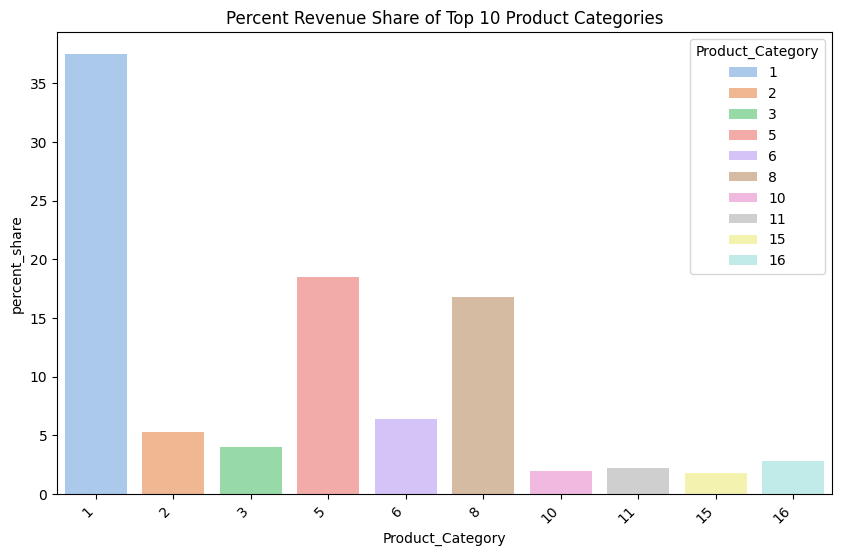

In [ ]:
#Top 10 product categories by revenue
top_10_product_revenue = product_revenue.head(10)

plt.figure(figsize=(10, 6))

plt.title('Percent Revenue Share of Top 10 Product Categories')
# Creates the bar plot
sns.barplot(data=top_10_product_revenue, x='Product_Category', y='percent_share', hue = 'Product_Category', palette='pastel')

# Rotates x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

- Product Category 1, 5, 6, 8 generates the most revenue

**Visualizing the spending behaviour between Males and Females**

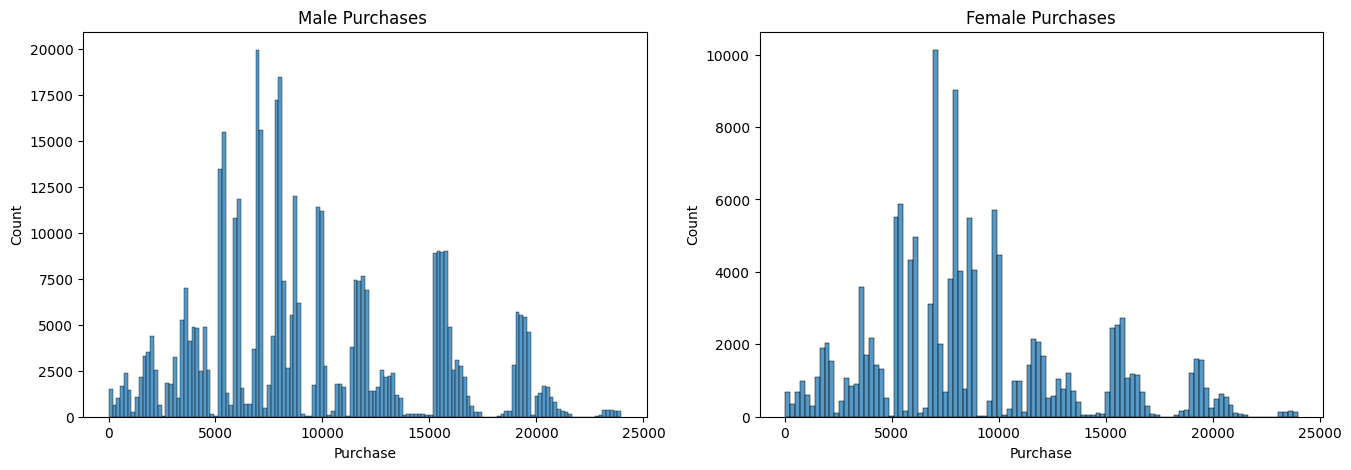

In [ ]:
# Creates a figure with 1 row and 2 columns of subplots, with a specified figure size
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

# Plot histogram for male and female purchases in the subplots
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Purchases ")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Purchases")
plt.show() # Display the plot

- From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.

**PURCHASES BASED ON GENDER**

In [ ]:

# Group by Gender and User_ID, then sum the Purchase amounts and Rename columns for clarity
cust_gender = df.groupby(by=['Gender', 'User_ID'])['Purchase'].sum().reset_index().rename(columns={'Purchase': 'Total_Purchase'})


# Display the result
print(cust_gender)


     Gender  User_ID  Total_Purchase
0         F  1000001          334093
1         F  1000006          379930
2         F  1000010         2169510
3         F  1000011          557023
4         F  1000016          150490
...     ...      ...             ...
5886      M  1006030          737361
5887      M  1006032          517261
5888      M  1006033          501843
5889      M  1006034          197086
5890      M  1006040         1653299

[5891 rows x 3 columns]


In [ ]:
male_customer = cust_gender.loc[cust_gender['Gender'] == 'M'] # Filters the DataFrame to include only male customers
female_customer = cust_gender.loc[cust_gender['Gender'] == 'F'] # Filters the DataFrame to include only female customers

**PURCHASING TREND OF BOTH THE GENDERS**

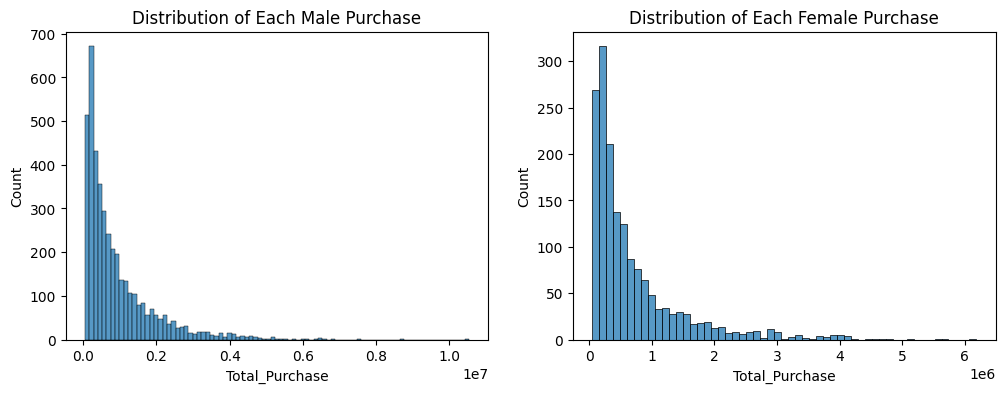

In [ ]:

# Sets the figure size
plt.figure(figsize=(12, 4))

# Plots the distribution of purchases for male customers in the first subplot
plt.subplot(1, 2, 1)  # Creates the first subplot in a 1x2 grid
plt.title('Distribution of Each Male Purchase')  # Sets the title for the first subplot
sns.histplot(data=male_customer, x='Total_Purchase')  # Plots histogram for male customers

# Plots the distribution of purchases for female customers in the second subplot
plt.subplot(1, 2, 2)  # Creates the second subplot in a 1x2 grid
plt.title('Distribution of Each Female Purchase')  # Sets the title for the second subplot
df_female = df[df['Gender'] == 'F']  # Filters the DataFrame for female customers
sns.histplot(data=female_customer, x='Total_Purchase')  # Plots histogram for female customers

# Display the plot
plt.show()

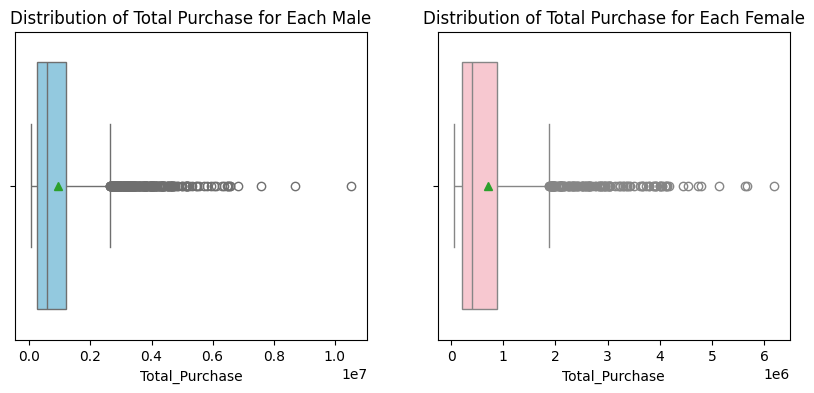

In [ ]:
# Sets the figure size
plt.figure(figsize=(10, 4))

# Plots the boxplot for male customers in the first subplot
plt.subplot(1, 2, 1)  # Creates the first subplot in a 1x2 grid
plt.title('Distribution of Total Purchase for Each Male')  # Sets the title for the first subplot
sns.boxplot(data=male_customer, x='Total_Purchase', showmeans=True, color='skyblue')  # Boxplot for male purchases

# Plots the boxplot for female customers in the second subplot
plt.subplot(1, 2, 2)  # Creates the second subplot in a 1x2 grid
plt.title('Distribution of Total Purchase for Each Female')  # Sets the title for the second subplot
sns.boxplot(data=female_customer, x='Total_Purchase', showmeans=True, color='pink')  # Boxplot for female purchases

# Display the plot
plt.show()

- The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.

**Number of transactions made based on Age**

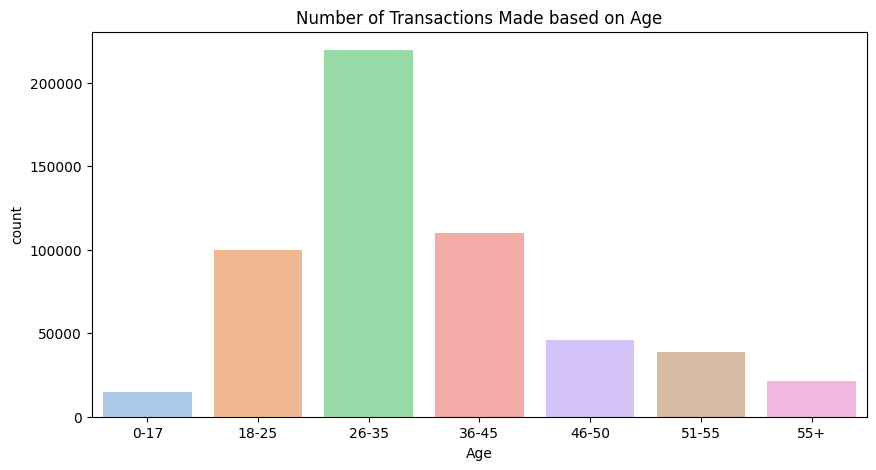

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Number of Transactions Made based on Age')

#Create a count plot for the 'Age' column with different colors for each age group
sns.countplot(data = df, x = 'Age', hue = 'Age', palette='pastel')
plt.show()


**TOTAL PURCHASES DISTRIBUTION**

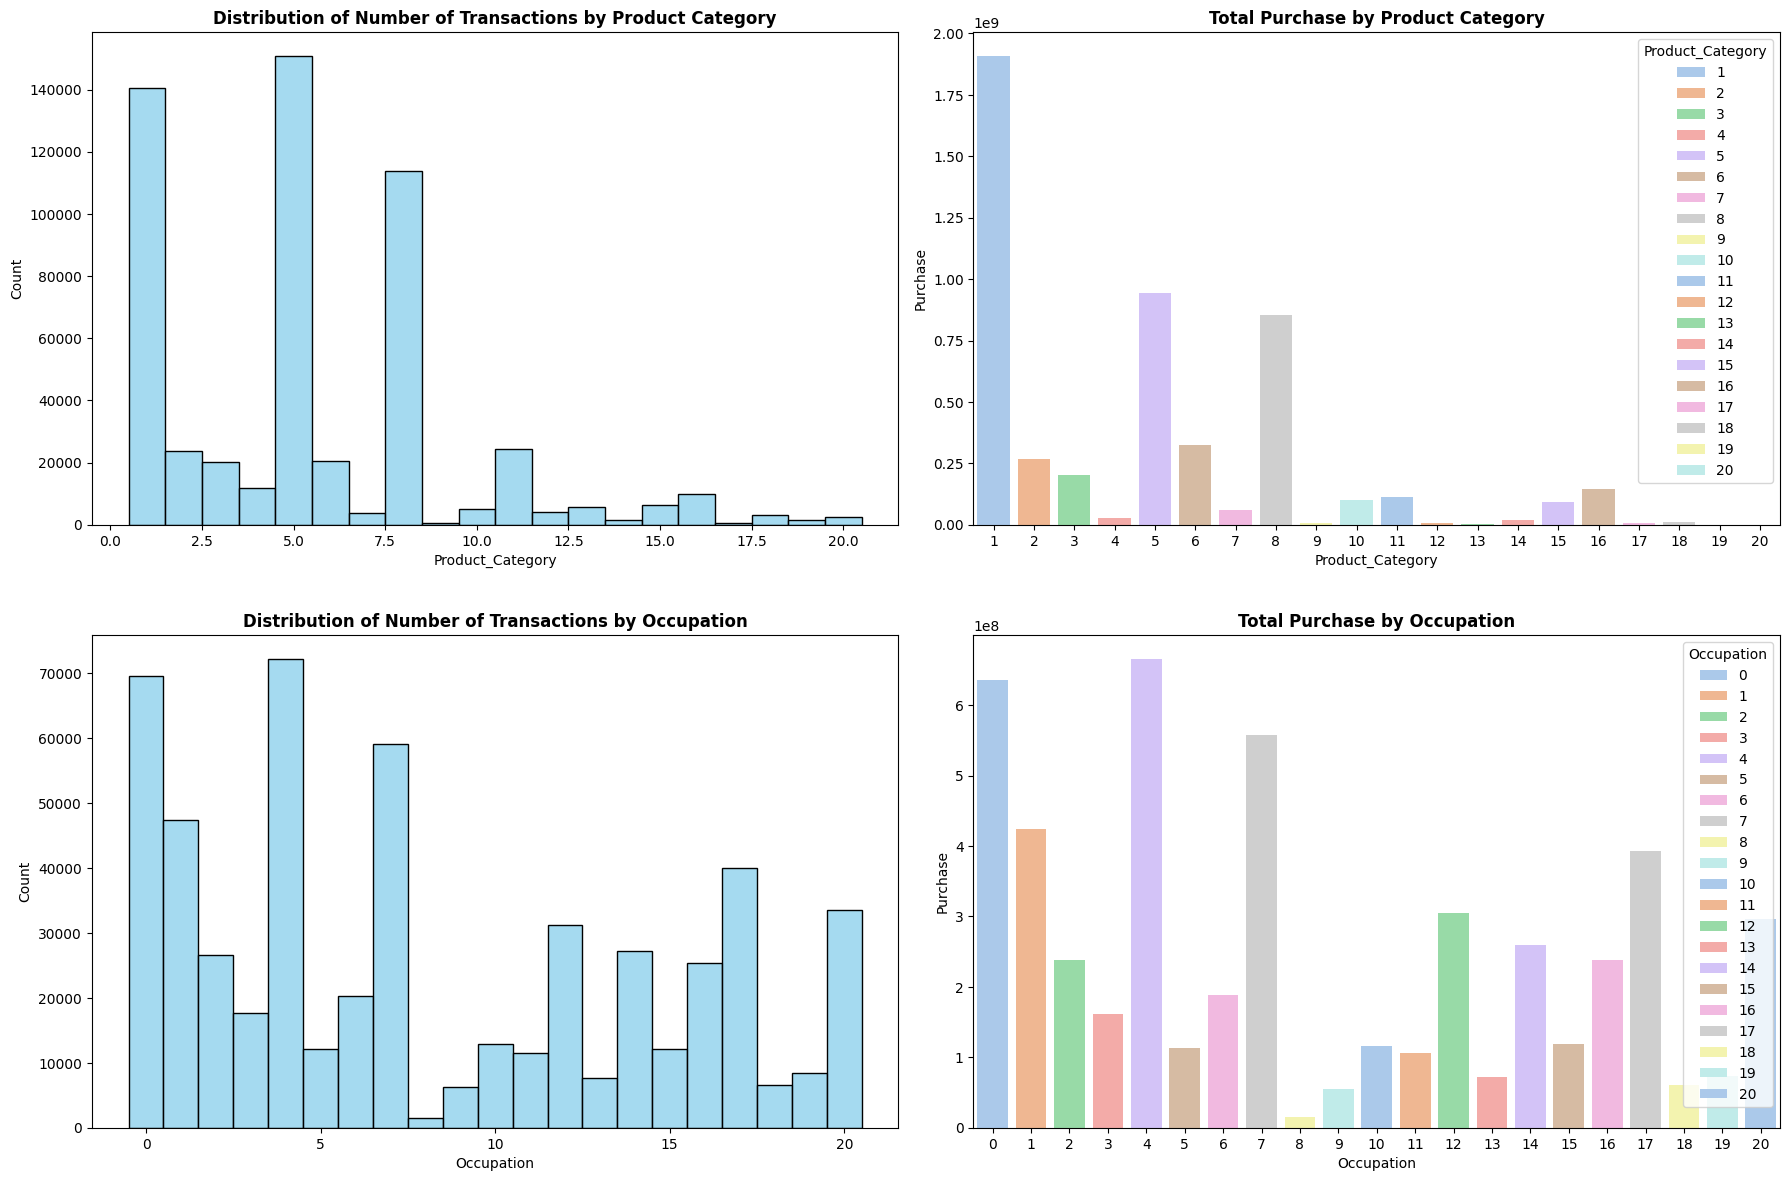

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12)) # Create a figure with 2 rows and 2 columns of subplots, with a specified figure size

# Distribution of number of Transactions Made based on Product Category
sns.histplot(data=df, x='Product_Category', discrete=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Number of Transactions by Product Category', fontweight='bold')

# Distribution of total purchase made for different Product Categories
df_product_category = df.groupby('Product_Category')['Purchase'].sum().reset_index()
sns.barplot(data=df_product_category, x='Product_Category', y='Purchase', ax=axs[0, 1], hue = 'Product_Category', palette='pastel')
axs[0, 1].set_title('Total Purchase by Product Category', fontweight='bold')

# Distribution of number of Transactions Made based on Occupation
sns.histplot(data=df, x='Occupation', discrete=True, ax=axs[1, 0], color='skyblue')
axs[1, 0].set_title('Distribution of Number of Transactions by Occupation', fontweight='bold')

# Distribution of total purchase made by customers with different Occupations
df_occupation = df.groupby('Occupation')['Purchase'].sum().reset_index()
sns.barplot(data=df_occupation, x='Occupation', y='Purchase', ax=axs[1, 1],hue = 'Occupation', palette='pastel')
axs[1, 1].set_title('Total Purchase by Occupation', fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

---



**PURCHASE DISTRIBUTION ACCROSS DATA**

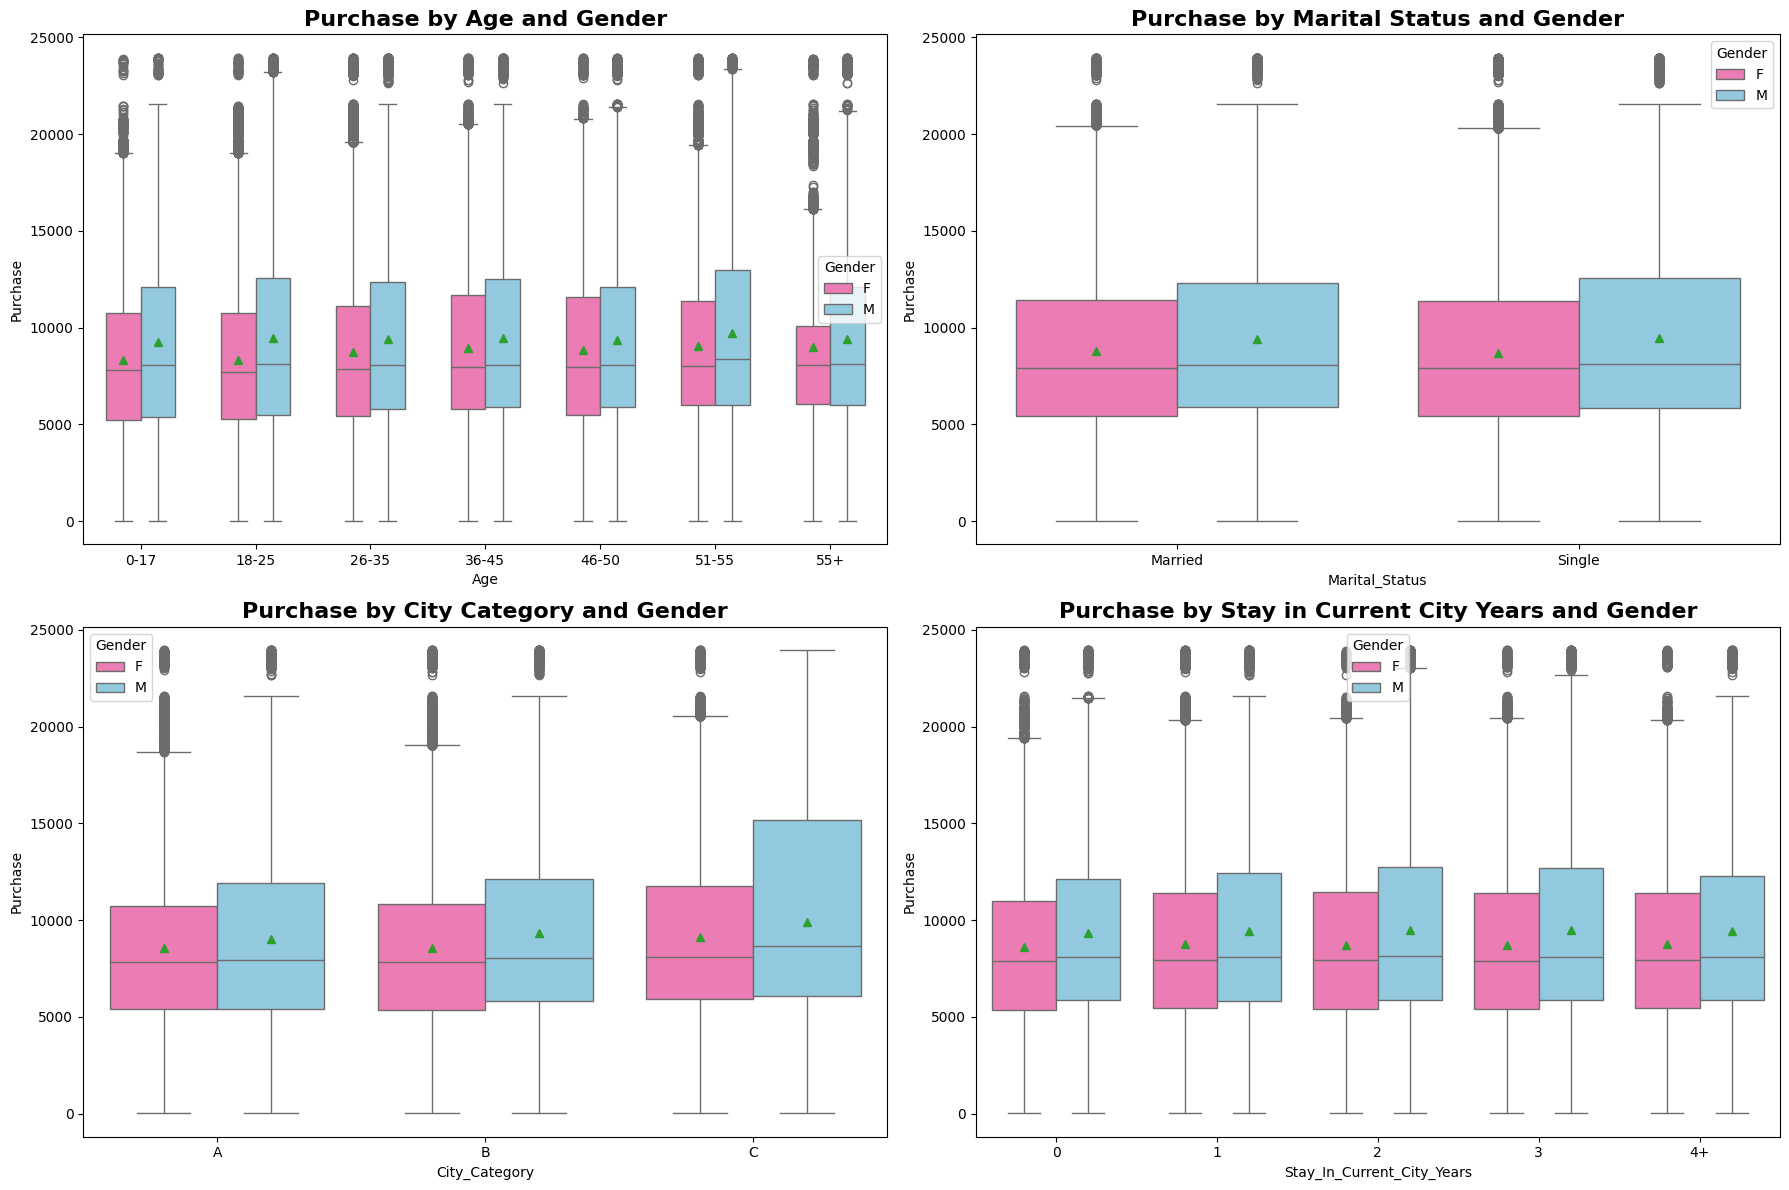

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

palette = {'M': 'skyblue', 'F': 'hotpink'}

# Plot 1: Boxplot of Purchase by Age and Gender
sns.boxplot(data=df, x='Age', y='Purchase', hue='Gender', showmeans=True, width=0.6, ax=axs[0, 0], palette=palette)
axs[0, 0].set_title('Purchase by Age and Gender', fontsize=16, fontweight='bold')
axs[0, 0].legend(title='Gender')

# Plot 2: Boxplot of Purchase by Marital Status and Gender
sns.boxplot(data=df, x='Marital_Status', y='Purchase', hue='Gender', showmeans=True, width=0.8, ax=axs[0, 1], palette=palette)
axs[0, 1].set_title('Purchase by Marital Status and Gender', fontsize=16, fontweight='bold')
axs[0, 1].legend(title='Gender')

# Plot 3: Boxplot of Purchase by City Category and Gender
sns.boxplot(data=df, x='City_Category', y='Purchase', hue='Gender', showmeans=True, ax=axs[1, 0], palette=palette)
axs[1, 0].set_title('Purchase by City Category and Gender', fontsize=16, fontweight='bold')
axs[1, 0].legend(title='Gender')

# Plot 4: Boxplot of Purchase by Stay In Current City Years and Gender
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', showmeans=True, ax=axs[1, 1], palette=palette)
axs[1, 1].set_title('Purchase by Stay in Current City Years and Gender', fontsize=16, fontweight='bold')
axs[1, 1].legend(title='Gender')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- The purchasing behaviour of males and females basis different city categories is also similar in nature. Still,  males from city category B tends to purchase costlier products in comparison to females.
- Males and females spending behaviour remains similar even when take into account their marital status.
- Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.

In [ ]:
total_purchase_per_user = df.groupby(['Gender', 'User_ID'])['Purchase'].sum()

total_purchase_per_user = total_purchase_per_user.reset_index()
total_purchase_per_user




,Gender,User_ID,Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


**DETERMINING MEAN PURCHASE DONE BY EACH USER**

In [ ]:
total_purchase_per_user.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [ ]:
total_purchase_per_user.groupby(['Gender'])['Purchase'].sum()

,Purchase
Gender,
F,1186232642
M,3909580100


In [ ]:
males = total_purchase_per_user[total_purchase_per_user['Gender']=='M']
females = total_purchase_per_user[total_purchase_per_user['Gender']=='F']

In [ ]:
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = males.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = females.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

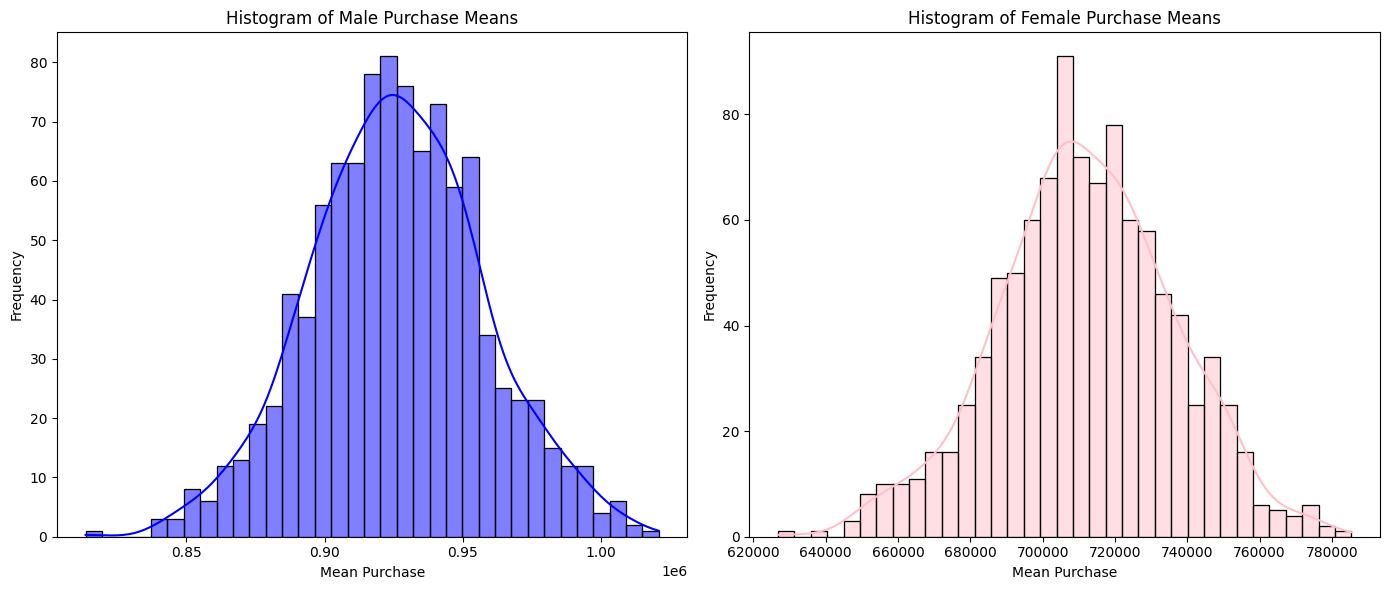

In [ ]:

# Create histograms
plt.figure(figsize=(14, 6))

# Histogram for Male Purchase Means
plt.subplot(1, 2, 1)
sns.histplot(male_means, bins=35, color='blue', kde=True)
plt.title('Histogram of Male Purchase Means')
plt.xlabel('Mean Purchase')
plt.ylabel('Frequency')

# Histogram for Female Purchase Means
plt.subplot(1, 2, 2)
sns.histplot(female_means, bins=35, color='pink', kde=True)
plt.title('Histogram of Female Purchase Means')
plt.xlabel('Mean Purchase')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- The sample means for both males and females appear to follow a normal distribution, as expected from the Central Limit Theorem. This suggests that the sample means are reliable estimates of the population means. Additionally, the mean of the sample means is close to the overall population mean, reinforcing the accuracy and consistency of the sampling process.

**MEAN PURCHASES BY MALE(Confidence Intervals at 90%, 95%, and 99% level)**

[]

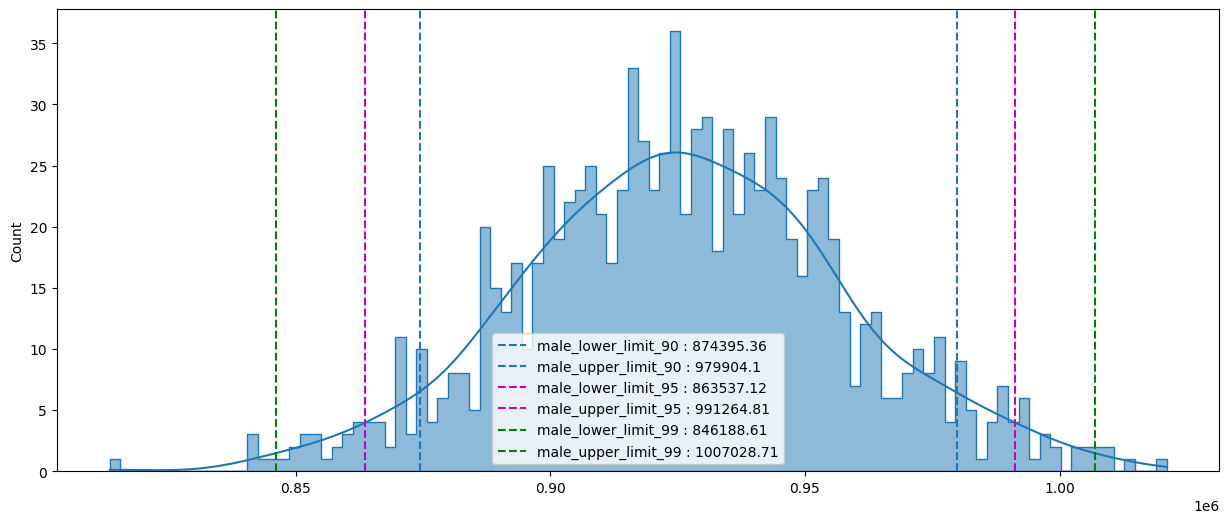

In [ ]:
plt.figure(figsize = (15, 6)) # setting the figure size of the plot
sns.histplot(male_means, kde = True, bins = 100, fill = True, element = 'step')
# Above line plots a histogram of the data contained in the `means_male` variable.
 # The `kde=True` argument adds a kernel density estimation line to the plot.
 # The `bins=100` argument sets the number of bins for the histogram


male_lower_limit_90 = np.percentile(male_means, 5) # calculating the lower limit of the 90% confidence interval

male_upper_limit_90 = np.percentile(male_means, 95)# calculating the upper limit of the 90% confidence interval

# adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(male_lower_limit_90, label = f'male_lower_limit_90 : {round(male_lower_limit_90, 2)}', linestyle = '--')

 # adding a vertical line at the upper limit of the 90% confidence interval
plt.axvline(male_upper_limit_90, label = f'male_upper_limit_90 : {round(male_upper_limit_90, 2)}', linestyle = '--')


# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
 # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
male_lower_limit_95 = np.percentile(male_means, 2.5)
male_upper_limit_95 = np.percentile(male_means, 97.5)
plt.axvline(male_lower_limit_95, label = f'male_lower_limit_95 : {round(male_lower_limit_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_upper_limit_95, label = f'male_upper_limit_95 : {round(male_upper_limit_95, 2)}', linestyle = '--', color = 'm')
male_lower_limit_99 = np.percentile(male_means, 0.5)
male_upper_limit_99 = np.percentile(male_means, 99.5)
plt.axvline(male_lower_limit_99, label = f'male_lower_limit_99 : {round(male_lower_limit_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_upper_limit_99, label = f'male_upper_limit_99 : {round(male_upper_limit_99, 2)}', linestyle = '--', color = 'g')
plt.legend() # displaying a legend for the plotted lines.
plt.plot()

**MEAN PURCHASES BY FEMALE(Confidence Intervals at 90%, 95%, and 99% level)**

[]

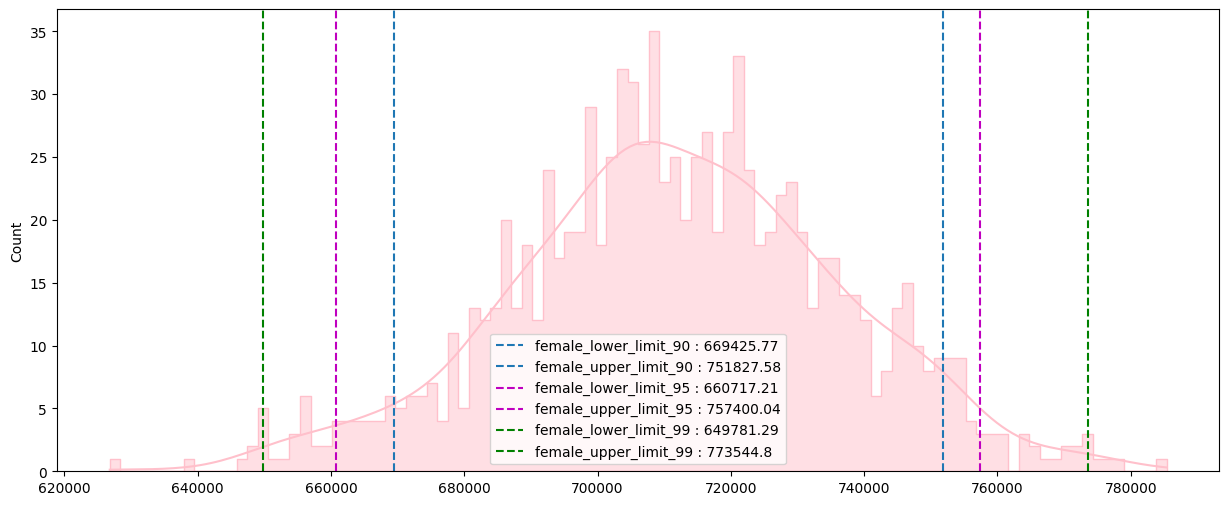

In [ ]:
# The below code generates a histogram plot with kernel density estimation and
 # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level
plt.figure(figsize = (15, 6)) # setting the figure size of the plot
sns.histplot(female_means, kde = True, bins = 100, fill = True, element = 'step', color='pink')
# Above line plots a histogram of the data contained in the `means_female` variable.
 # The `kde=True` argument adds a kernel density estimation line to the plot.
 # The `bins=100` argument sets the number of bins for the histogram


# Similar steps are repeated for calculating and plotting the 90% confidence interval for females

female_lower_limit_90 = np.percentile(female_means, 5)
 # calculating the lower limit of the 90% confidence interval
female_upper_limit_90 = np.percentile(female_means, 95)
 # calculating the upper limit of the 90% confidence interval
plt.axvline(female_lower_limit_90, label = f'female_lower_limit_90 : {round(female_lower_limit_90, 2)}', linestyle = '--')
 # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(female_upper_limit_90, label = f'female_upper_limit_90 : {round(female_upper_limit_90, 2)}', linestyle = '--')
 # adding a vertical line at the upper limit of the 90% confidence interval

# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
 # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
female_lower_limit_95 = np.percentile(female_means, 2.5)
female_upper_limit_95 = np.percentile(female_means, 97.5)
plt.axvline(female_lower_limit_95, label = f'female_lower_limit_95 : {round(female_lower_limit_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_upper_limit_95, label = f'female_upper_limit_95 : {round(female_upper_limit_95, 2)}', linestyle = '--', color = 'm')
female_lower_limit_99 = np.percentile(female_means, 0.5)
female_upper_limit_99 = np.percentile(female_means, 99.5)
plt.axvline(female_lower_limit_99, label = f'female_lower_limit_99 : {round(female_lower_limit_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_upper_limit_99, label = f'female_upper_limit_99 : {round(female_upper_limit_99, 2)}', linestyle = '--', color = 'g')
plt.legend() # displaying a legend for the plotted lines.
plt.plot()

- Males might be more inclined to buy products that are typically more expensive or fall into higher price ranges. This can include items such as electronics, gadgets, or luxury goods.

- There could be a difference in income between males and females, with males potentially earning more or holding higher-paying positions. This income gap can affect purchasing power, allowing males to spend more on products.

- Males may have different spending habits, often gravitating towards hobbies or interests that require higher expenditure, such as sports gear, gaming, or collectibles.

- Marketers may specifically target males with products or services that are priced higher. This strategic approach in advertising can influence purchasing behaviors, leading to higher spending among males.

**MEAN PURCHASES BY MARITAL STATUS**

In [ ]:
df_single = df.loc[df['Marital_Status'] == 'Single']
df_married = df.loc[df['Marital_Status'] == 'Married']
df_single = df_single.groupby('User_ID')['Purchase'].sum().to_frame().reset_index()
df_married = df_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index()

**PURCHASE TREND BY SINGLE(UNMARRIED)**

In [ ]:
# It iterates over a range of sample sizes from 50 to 1000, and for each iteration,
 # it takes a random sample of the specified size from the 'Purchase' column
 # of the 'df_single' DataFrame and calculates the mean of the sampled values.
 # The calculated mean values are then stored in the 'mean_purchases' list.

single_mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_single['Purchase'].sample(sample_size).mean()
    single_mean_purchases.append(sample_mean)

[]

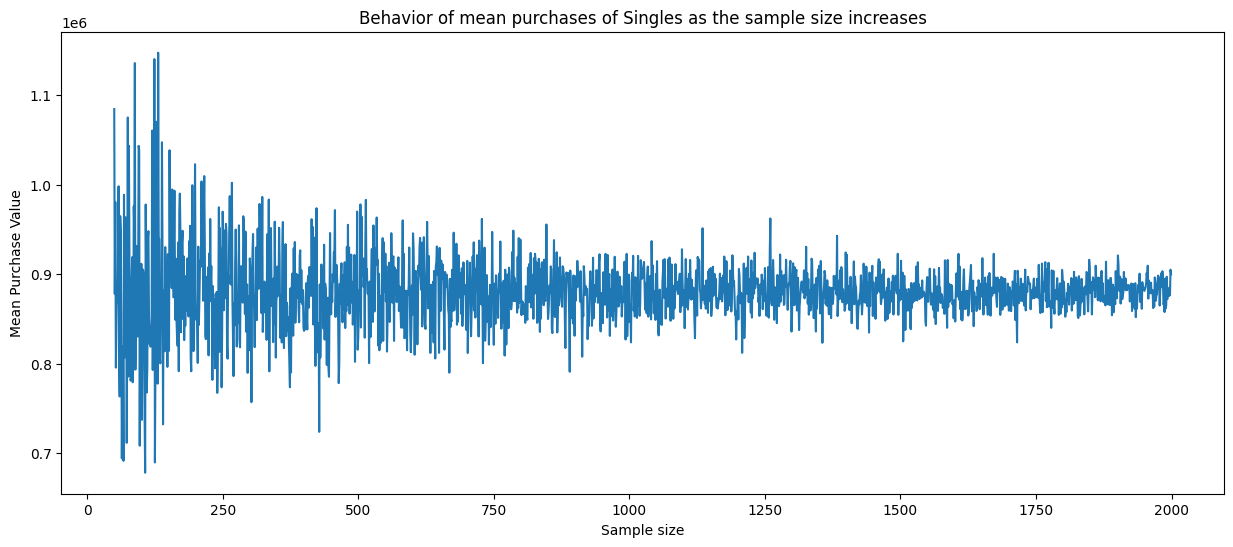

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases of Singles as the sample size increases')
plt.plot(np.arange(50, 2000), single_mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

**PURCHASE TREND BY MARRIED INDIVIDUALS**

In [ ]:
married_mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = avg_married_purchases['Purchase'].sample(sample_size).mean()
    married_mean_purchases.append(sample_mean)

[]

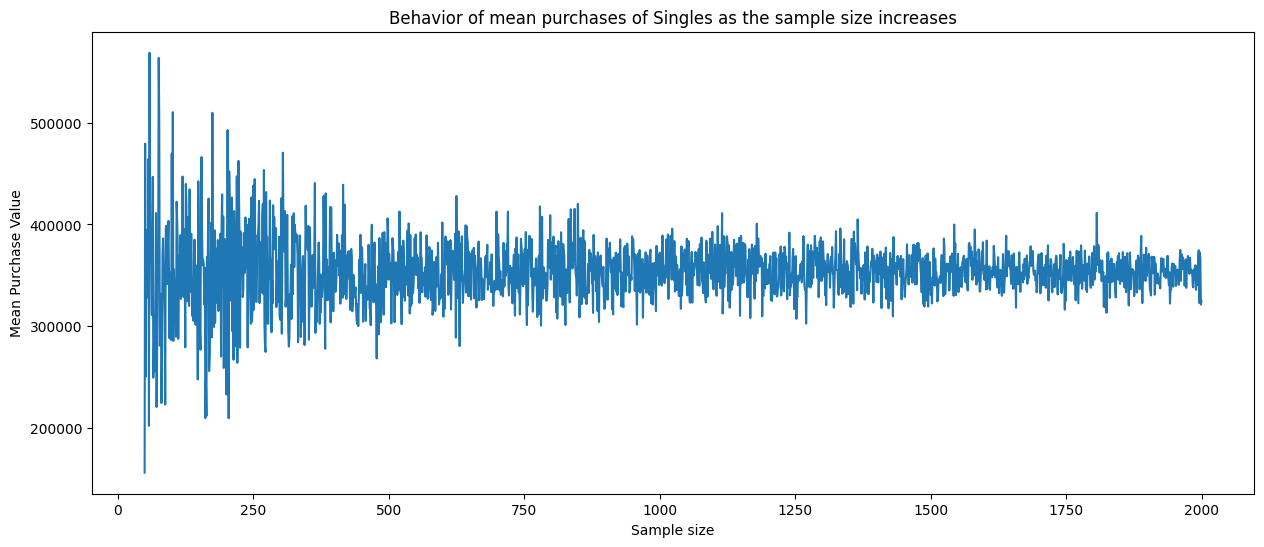

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases of Singles as the sample size increases')
plt.plot(np.arange(50, 2000), married_mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()


**MEAN PURCHASES BY MARRITAL STATUS(Confidence Intervals at 90%, 95%, and 99% level)**

In [ ]:
# Confidence interval z-scores
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

# Assuming `married_means` and `single_means` contain the sample means
print("Population avg spend amount for Married: {:.2f}".format(df_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(df_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

# Sample standard error calculations
sample_std_error_married = pd.Series(married_means).std() / np.sqrt(1000)
sample_std_error_single = pd.Series(single_means).std() / np.sqrt(1000)

print("Sample std error for Married: {:.2f}".format(sample_std_error_married))
print("Sample std error for Single: {:.2f}\n".format(sample_std_error_single))

# Sample mean calculations
sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

# Confidence Interval Calculations 90
Upper_Limit_married = z90 * sample_std_error_married + sample_mean_married
Lower_Limit_married = sample_mean_married - z90 * sample_std_error_married

Upper_Limit_single = z90 * sample_std_error_single + sample_mean_single
Lower_Limit_single = sample_mean_single - z90 * sample_std_error_single

print("Married_CI at 90%: ", [Lower_Limit_married, Upper_Limit_married])
print("Single_CI at 90%: ", [Lower_Limit_single, Upper_Limit_single])

print('*'* 50)
print(' '* 50)


# Confidence Interval Calculations 95
Upper_Limit_married = z95 * sample_std_error_married + sample_mean_married
Lower_Limit_married = sample_mean_married - z95 * sample_std_error_married

Upper_Limit_single = z95 * sample_std_error_single + sample_mean_single
Lower_Limit_single = sample_mean_single - z95 * sample_std_error_single

# Print confidence intervals
print("Married_CI at 95%: ", [Lower_Limit_married, Upper_Limit_married])
print("Single_CI at 95%: ", [Lower_Limit_single, Upper_Limit_single])

print('*'* 50)
print(' '* 50)

# Confidence Interval Calculations 99
Upper_Limit_married=z99*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z99*sample_std_error_married

Upper_Limit_single=z99*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z99*sample_std_error_single

print("Married_CI at 99%: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI at 99%: ",[Lower_Limit_single,Upper_Limit_single])


Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 355115.81
Sample avg spend amount for Single: 880579.87

Sample std for Married: 23144.91
Sample std for Single: 16015.51

Sample std error for Married: 731.91
Sample std error for Single: 506.45

Married_CI at 90%:  [353911.821967105, 356319.793812895]
Single_CI at 90%:  [879746.7525245353, 881412.9887369805]
**************************************************
                                                  
Married_CI at 95%:  [353681.2714712315, 356550.3443087685]
Single_CI at 95%:  [879587.2192701522, 881572.5219913636]
**************************************************
                                                  
Married_CI at 99%:  [353230.41716818995, 357654.8371255325]
Single_CI at 99%:  [879275.2431282476, 881884.4981332682]


**MEAN PURCHASES BY AGE GROUPS**

Major chunk of the customers with most purchases belong to the 26-35 age group category.
We'll find out the mean purchase of that group of customers

**df_age_26_to_35**

In [ ]:
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index()

In [ ]:
# The code snippet performs a loop to calculate the mean purchase for different
 # sample sizes of customers with age group 26 - 35 yrs.
mean_purchases = []
for sample_size in range(50, 2000):
 sample_mean = df_age_26_to_35['Purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

# It iterates over a range of sample sizes from 50 to 2000, and for each iteration,
 # it takes a random sample of the specified size from the 'Total_Purchase' column
 # of the 'df_age_26_to_35' DataFrame and calculates the mean of the sampled values.
 # The calculated mean values are then stored in the 'mean_purchases' list.

[]

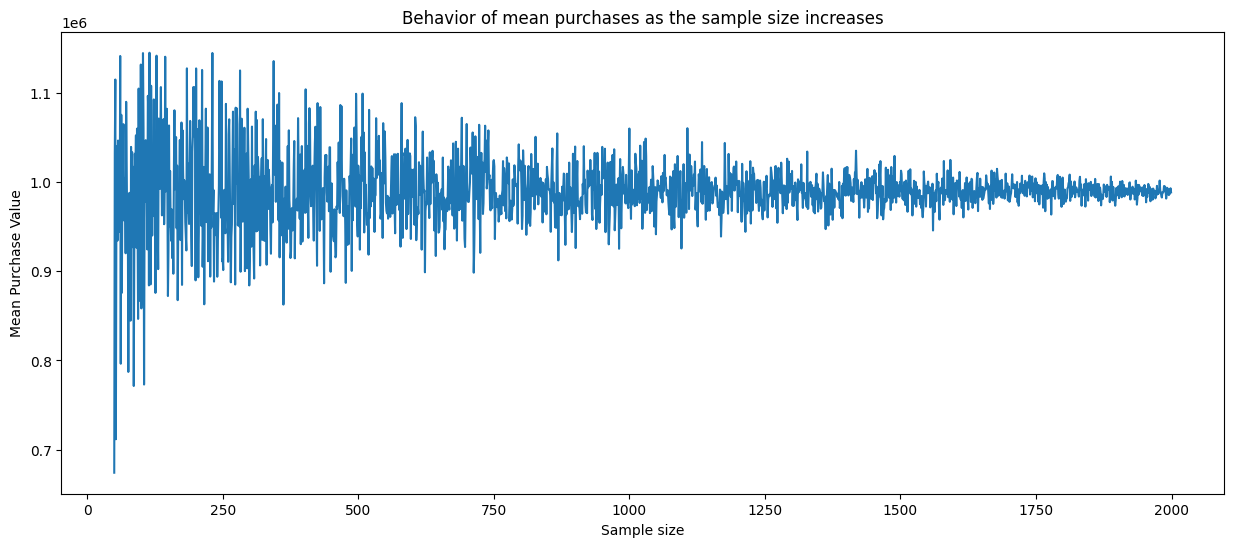

In [ ]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
 # as the sample size increases
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

It can be inferred from the above plot that as the sample size is small the deviations are fairly high.
As the sample size increases, the deviation becomes smaller and smaller.
The deviations will be small if the sample size taken is greater than 1250.

**df_age_26_to_35**

The next group of customers with most purchases belonged to 26-35 age category.

In [ ]:
means = []
size = df_age_26_to_35['Purchase'].shape[0]
for bootstrapped_sample in range(10000):
 sample_mean = df_age_26_to_35['Purchase'].sample(size, replace = True).mean()
 means.append(sample_mean)

**MEAN PURCHASES BY AGE GROUP 26-35(Confidence Intervals at 90%, 95%, and 99% level)**

[]

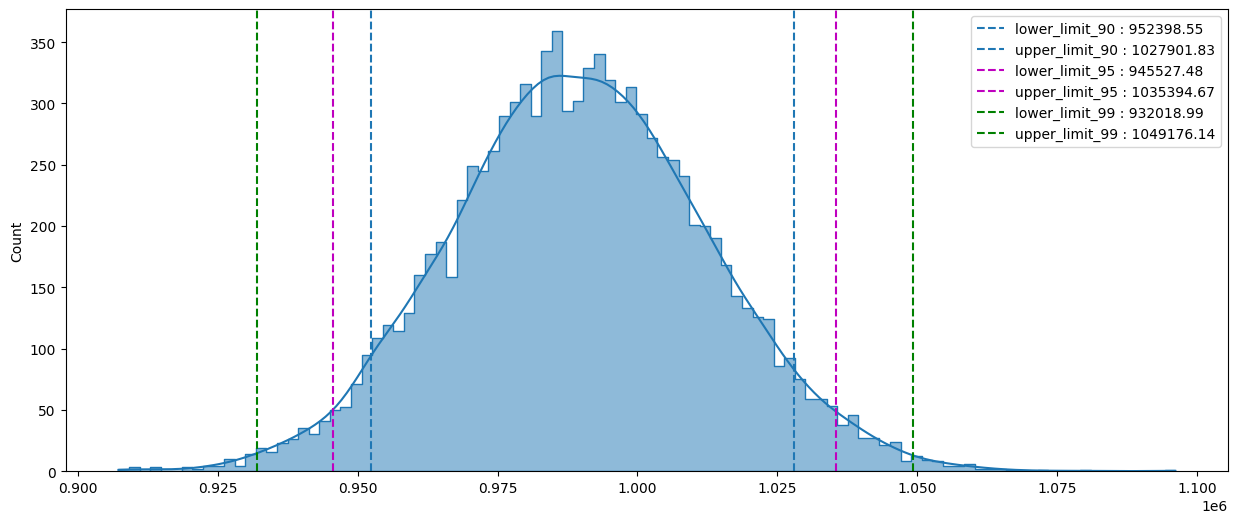

In [ ]:
# The below code generates a histogram plot with kernel density estimation and
 # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level
plt.figure(figsize = (15, 6)) # setting the figure size of the plot
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')
# Above line plots a histogram of the data contained in the `means` variable.
 # The `kde=True` argument adds a kernel density estimation line to the plot.
 # The `bins=100` argument sets the number of bins for the histogram

# Above line calculates the z-score corresponding to the 90% confidence level using the
 # inverse of the cumulative distribution function (CDF) of a standard normal distribution

ll_90 = np.percentile(means, 5)
 # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
 # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'lower_limit_90 : {round(ll_90, 2)}', linestyle = '--')
 # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'upper_limit_90 : {round(ul_90, 2)}', linestyle = '--')
 # adding a vertical line at the upper limit of the 90% confidence interval

# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
 # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'lower_limit_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'upper_limit_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')
ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'lower_limit_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'upper_limit_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')
plt.legend() # displaying a legend for the plotted lines.
plt.plot() # displaying the plot.

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each
individual in age group 26 - 35 years on Black Friday at Walmart, despite having data for only 2053 individuals having age group 26 -
35 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age
group 26 - 35 years falls, with a certain level of confidence.

**For Age Group 36 - 45 years**

In [ ]:
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index()


In [ ]:
# The code snippet performs a loop to calculate the mean purchase for different
 # sample sizes of customers with age group 26 - 35 yrs.
mean_purchases = []
for sample_size in range(50, 2000):
 sample_mean = df_age_26_to_35['Purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

# It iterates over a range of sample sizes from 50 to 2000, and for each iteration,
 # it takes a random sample of the specified size from the 'Total_Purchase' column
 # of the 'df_age_26_to_35' DataFrame and calculates the mean of the sampled values.
 # The calculated mean values are then stored in the 'mean_purchases' list.

**Finding the confidence interval of total spending for each individual in the age group 26 - 35 on the Black Friday**

In [ ]:
means = []
size = df_age_26_to_35['Purchase'].shape[0]
for bootstrapped_sample in range(10000):
 sample_mean = df_age_26_to_35['Purchase'].sample(size, replace = True).mean()
 means.append(sample_mean)

**MEAN PURCHASES BY AGE GROUP 26-35(Confidence Intervals at 90%, 95%, and 99% level)**

[]

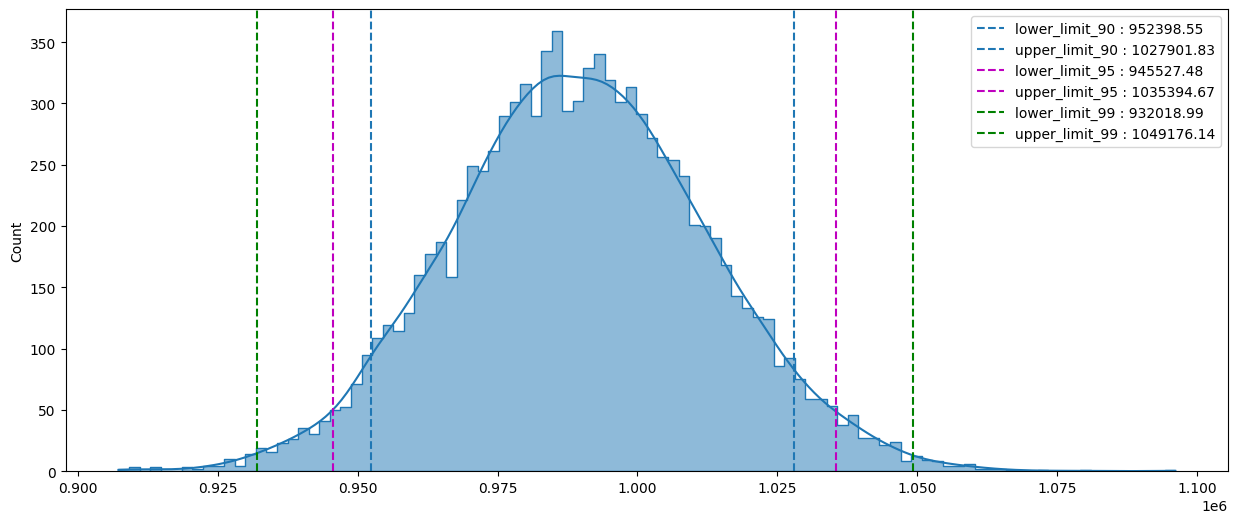

In [ ]:
# The below code generates a histogram plot with kernel density estimation and
 # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level
plt.figure(figsize = (15, 6)) # setting the figure size of the plot
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')
# Above line plots a histogram of the data contained in the `means` variable.
 # The `kde=True` argument adds a kernel density estimation line to the plot.
 # The `bins=100` argument sets the number of bins for the histogram

# Above line calculates the z-score corresponding to the 90% confidence level using the
 # inverse of the cumulative distribution function (CDF) of a standard normal distribution

ll_90 = np.percentile(means, 5)
 # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
 # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'lower_limit_90 : {round(ll_90, 2)}', linestyle = '--')
 # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'upper_limit_90 : {round(ul_90, 2)}', linestyle = '--')
 # adding a vertical line at the upper limit of the 90% confidence interval

# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
 # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'lower_limit_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'upper_limit_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')
ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'lower_limit_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'upper_limit_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')
plt.legend() # displaying a legend for the plotted lines.
plt.plot() # displaying the plot.

# **INSIGHTS**

---



- How can Walmart leverage this conclusion to make changes or improvements?

**Targeted Marketing:**
Understanding that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can implement strategies to boost their transaction amounts. This can be achieved by offering more attractive discounts, coupons, and rewards programs tailored to this demographic. Additionally, Walmart can adjust its product selection and marketing strategies to better align with the preferences and needs of young shoppers.

**Customer Segmentation:**
Customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, as do those in the 36 - 45 and 55+ age groups. Walmart can leverage this information to optimize its product selection and tailor its offerings to meet the specific preferences of these segments. Furthermore, pricing strategies can be adjusted to align with the purchasing behaviors of these different age groups.

**Premium Services:**
Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart should explore opportunities to enhance the shopping experience for this valuable demographic. This could involve offering premium services, personalized product recommendations, and loyalty programs specifically designed to cater to the preferences and spending habits of these customers.

# **RECOMMENDATIONS**

---

**Target Male Shoppers:**
Male customers account for a substantial portion of Black Friday sales and tend to spend more per transaction on average. Walmart should develop marketing strategies and product offerings specifically aimed at increasing male customer spending, while maintaining competitive pricing for products targeting female shoppers.

**Focus on the 26 - 45 Age Group:**
The age group between 26 and 45 contributes to the majority of sales. Walmart should cater to the preferences and needs of this demographic by offering exclusive deals on products popular within this age bracket.

**Engage Younger Shoppers:**
Customers in the 0 - 17 age group have the lowest spending per transaction. To increase their spending, Walmart could offer more attractive discounts, coupons, or rewards programs aimed at younger consumers, thereby fostering early brand loyalty.

**Customer Segmentation:**
Customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, as do customers in the 36 - 45 and 55+ age groups. Walmart can optimize its product selection and adjust pricing strategies to better cater to these segments, ensuring that their specific preferences are met.

**Enhance the Shopping Experience for the 51 - 55 Age Group:**
Customers aged 51 - 55 have the highest spending per transaction. Walmart should consider offering this group exclusive pre-sale access, special discounts, and personalized product recommendations. Additionally, introducing loyalty programs tailored to this age group could help reward and retain these high-value customers.

**Leverage Post-Black Friday Engagement:**
After Black Friday, Walmart should maintain engagement with customers by sending follow-up emails and offers for related products. This strategy can increase customer retention and encourage repeat business throughout the holiday season and beyond.

**Personalized Marketing Campaigns:**
Utilize data analytics to create personalized marketing campaigns that target different customer segments with relevant offers and product recommendations. Personalized approaches can enhance customer satisfaction and drive higher conversion rates.

**Improve Customer Experience Across All Age Groups:**
Implement feedback mechanisms to continuously gather insights from customers across all age groups. Use this information to enhance the shopping experience, address pain points, and build long-term customer loyalty.

**Introduce New Product Lines and Innovations:**
Based on the buying patterns and preferences of different customer segments, introduce new product lines and innovations that cater specifically to the needs and desires of these groups. This can help keep the product offerings fresh and appealing.

**Expand Digital and Online Engagement:**
Given the increasing trend towards online shopping, Walmart should expand its digital engagement efforts. This includes improving the online shopping experience, offering exclusive online deals, and leveraging social media to reach a broader audience.
